References
----------
[1] https://openstax.org/books/calculus-volume-1/pages/3-9-derivatives-of-exponential-and-logarithmic-functions
    
[2] Checkpoint 3.50
$$
\begin{equation}
h(x)=xe^{2x}
\end{equation}
$$

SymPy version: 1.13.2
NumPy version: 1.26.4
Matplotlib version: 3.9.2

Lambda(x, x*exp(2*x))
x:[ 0.          1.22222222  2.44444444  3.66666667  4.88888889  6.11111111
  7.33333333  8.55555556  9.77777778 11.        ]
y:[0.0, 14.0850667430329, 324.636717527496, 5611.74115943525, 86227.3623002951, 1242120.83837250, 17177257.5493635, 230945418.179367, 3041655549.24533, 39434041307.4475]
f′(x)=2*x*exp(2*x) + exp(2*x)
f′(2)=272.990750165721
y_tangent:[-436.785200265154 -103.129838951495 230.525522362165 564.180883675824
 897.836244989483 1231.49160630314 1565.14696761680 1898.80232893046
 2232.45769024412 2566.11305155778]


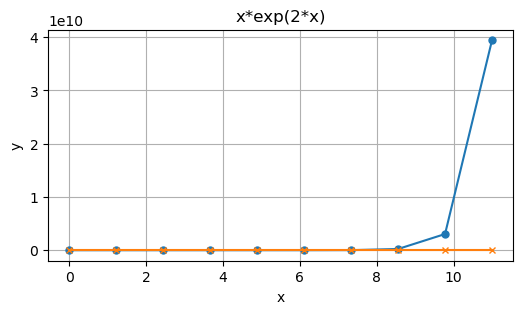

In [7]:
import sympy as sp
from sympy.abc import x
import numpy as np
import matplotlib
from matplotlib import pyplot as plt

print(f"SymPy version: {sp.__version__}")
print(f"NumPy version: {np.__version__}")
print(f"Matplotlib version: {matplotlib.__version__}")
print()

f = sp.Lambda(x, x * sp.exp(2 * x))
print(f)

x_values = np.linspace(0, 11, 10)
print(f"x:{x_values}")


def map_x_values(x_value):
    result = f(x_value)
    if result == sp.zoo:
        return np.inf
    return result


y_values = list(map(map_x_values, x_values))
print(f"y:{y_values}")

f_prime = sp.diff(f(x), x)
print(f"f′(x)={f_prime}")

x_at = 2


def calculate_slope(derivative_fn, derivative_order=1):
    slope = derivative_fn.subs(x, x_at).evalf()
    apostrophe = "′" * derivative_order
    print(f"f{apostrophe}({x_at})={slope}")
    y_tangent = slope * (x_values - x_at) + f(x_at).evalf()
    print(f"y_tangent:{y_tangent}")
    return slope, y_tangent


slope, y_tangent = calculate_slope(f_prime)

figure, axes = plt.subplots(figsize=(6, 3))
axes.set_xlabel("x")
axes.set_ylabel("y")
axes.set_title(f.expr)
axes.grid()
axes.plot(x_values, y_values, marker="o", markersize=5, label="f′")
axes.plot(x_values, y_tangent, marker="x", markersize=5, label="f′′")
plt.show()